# Tarea 2 - Regresion Polinomial & Feature engineering

## Parte 1 - Modelo exponencial de covid-19 usando feature-eng

Usando el ejemplo de covid-19 en el notebook de feature-eng (https://colab.research.google.com/drive/1sJV2HG7tQgCGKES3-dIclzHQJ9qAWB3b?usp=sharing) crear un modelo de covid-19 para Guatemala.

* Convertir la fecha a un entero "número de día", por ejemplo si se usan datos desde el 22 de abril, este es el día 0, el 23 es el día 1.
* Aplicar regresión lineal sobre la variable "Confirmed" transformada.
* Una vez entrenado el modelo usarlo para aproximar la cantidad de casos confirmados para el 6 de Junio. Se debe reportar la cantidad de casos, no la cantidad transformada obtenida.

### Carga de Datos

Antes, de cualquier cosa colocamos las librerias que vamos a utilizar en el Notebook.

In [102]:
import datetime
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Cargamos el Dataset con la información del COVID19

In [103]:
covid19_data = pd.read_csv('covid_19_clean_complete.csv')
covid19_data["Date"] = pd.to_datetime(covid19_data["Date"],infer_datetime_format = True)
covid19_data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0


### Filtrado de Información 

Dado el Enunciado del Problema, solamente nos centraremos en crear un modelo para Guatemala; por lo que filtraremos en el dataset solamente los datos para Guatemala, a partir de la primera fecha que tiene un caso confirmado.

In [104]:
GT_confirmed = covid19_data[(covid19_data["Country/Region"] == 'Guatemala') & (covid19_data["Confirmed"] > 0)].copy()
print("Shape del Dataset= {} -> Solamente para Guatemala".format(GT_confirmed.shape))

Shape del Dataset= (67, 8) -> Solamente para Guatemala


### Revisión de Datos contenidos en Dataset

Revisamos que información nos envian en el dataset. Primero, revisamos las columnas enviadas y el tipo de dato.

In [105]:
GT_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 13903 to 31393
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  0 non-null      object        
 1   Country/Region  67 non-null     object        
 2   Lat             67 non-null     float64       
 3   Long            67 non-null     float64       
 4   Date            67 non-null     datetime64[ns]
 5   Confirmed       67 non-null     int64         
 6   Deaths          67 non-null     int64         
 7   Recovered       67 non-null     int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 4.7+ KB


Vemos la información estadistica de las variables (para las variables númericas)

In [106]:
GT_confirmed.describe()

,Lat,Long,Confirmed,Deaths,Recovered
count,67.0000,6.700000e+01,67.000000,67.000000,67.000000
mean,15.7835,-9.023080e+01,449.388060,10.626866,42.970149
std,0.0000,2.863622e-14,547.142908,11.105330,45.624611
min,15.7835,-9.023080e+01,1.000000,0.000000,0.000000
25%,15.7835,-9.023080e+01,37.000000,1.000000,11.000000
50%,15.7835,-9.023080e+01,196.000000,5.000000,19.000000
75%,15.7835,-9.023080e+01,695.500000,17.000000,72.000000
max,15.7835,-9.023080e+01,2133.000000,43.000000,155.000000


Por lo que veo, realmente para la creación del Modelo practicamente se tendrian que quitar las variables de Estado, Latitud, Longitud; dado que estas estan atadas al Pais y realmente no van a agregar algún valor al modelo.

Las Variables que en algún momento se podrían determinar con el modelo son Cantidad de Confirmados(Confirmed), muertes(Deaths) o recuperados(Recovered).

Quitamos las columnas que no nos servirán para nada.

In [107]:
GT_confirmed=GT_confirmed.drop('Province/State', axis=1)
GT_confirmed=GT_confirmed.drop('Lat', axis=1)
GT_confirmed=GT_confirmed.drop('Long', axis=1)


Así quedaría el Dataset

In [108]:
GT_confirmed.head()

,Country/Region,Date,Confirmed,Deaths,Recovered
13903,Guatemala,2020-03-14,1,0,0
14168,Guatemala,2020-03-15,1,0,0
14433,Guatemala,2020-03-16,2,1,0
14698,Guatemala,2020-03-17,6,1,0
14963,Guatemala,2020-03-18,6,1,0


Vemos la Gráfica de dispersión de los datos que tenemos; especificamente para el Dato de Confirmados (Confirmed) que es la que de acuerdo al problema nos interesa determinar con el modelo.

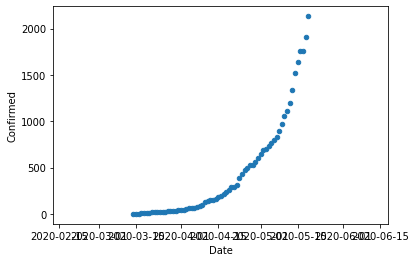

In [109]:
GT_confirmed.plot.scatter(x = "Date",y="Confirmed")

Vemos el Rango de Fechas del cual contamos la información:

In [110]:
print("Fecha Primer Caso   = {} -> Solamente para Guatemala".format(min(GT_confirmed["Date"])))   
print("Fecha Máxima Dataset= {} -> Solamente para Guatemala".format(max(GT_confirmed["Date"])))    

Fecha Primer Caso   = 2020-03-14 00:00:00 -> Solamente para Guatemala
Fecha Máxima Dataset= 2020-05-19 00:00:00 -> Solamente para Guatemala


### Transformación de Datos

En la gráfica anterior, vemos que los datos se comportan de forma exponencial; por lo que para el procesamiento del modelo transformaremos esos datos usando logaritmo natural.

In [111]:
##Dejamos la columna sin Modificar y agregamos una nueva columna
GT_confirmed["ln(confirmed)"] = np.log(GT_confirmed["Confirmed"])

Vemos como quedo la primera columna transformada; tanto a nivel de tabla como en forma gráfica.

In [112]:
GT_confirmed.head()

,Country/Region,Date,Confirmed,Deaths,Recovered,ln(confirmed)
13903,Guatemala,2020-03-14,1,0,0,0.000000
14168,Guatemala,2020-03-15,1,0,0,0.000000
14433,Guatemala,2020-03-16,2,1,0,0.693147
14698,Guatemala,2020-03-17,6,1,0,1.791759
14963,Guatemala,2020-03-18,6,1,0,1.791759


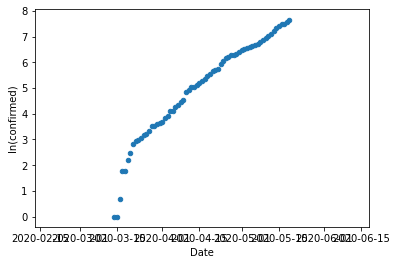

In [113]:
GT_confirmed.plot.scatter(x = "Date",y="ln(confirmed)")

Vemos que los datos de los primeros días, no tienen el mismo comportamiento que el resto de los datos; por lo que para no sesgar el modelo se quitaran.

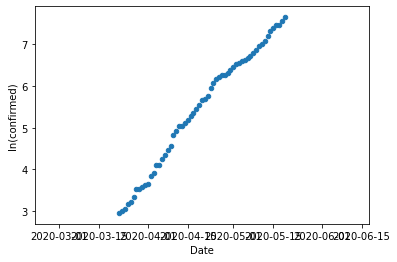

In [114]:
#Quitamos los datos y lo almacenamos en el dataset que ya teniamos
GT_confirmed = GT_confirmed[GT_confirmed.Date >= '2020-03-22']
#Vemos la gráfica nuevamente.
GT_confirmed.plot.scatter(x = "Date",y="ln(confirmed)")

Trabajar con las fechas complicaría los cálculos en el módelo, por lo que modificaremos el dato de fecha con la siguiente función.

In [115]:
#Modicará la fecha a un número consecutivo dependiendo la fecha. Siendo el número 0 la fecha 22-03-2020,
#número 1 la fecha 23-03-2020 y así en adelante
def mod_fecha_COVID(dates):
    #Nuestra fecha base será el primer dia de los datos de nuestro dataset ->22-03-2020 
    #Por facilidad se deja fijo.
    dt_base = datetime.datetime(2020, 3,22)
    
    #Se convierte en un objeto de Numpy Datetime64 que es el mismo dato que tenemos en el Dataset y para poder
    #manejar las operaciones vectorizadas
    dt_base64 = np.datetime64(dt_base)
    
    #Se busca hacer la función generica, por lo que condicionaremos si estamos usando un dataframe de pandas o otro objeto
    #ya que la forma de hacer las operaciones puede variar
    
    #Sino es un objeto de pandas devolvemos la información de esta forma
    if str(type(dates)).find('pandas') == -1:
        return (dates - dt_base64).astype('timedelta64[D]')/ np.timedelta64(1, 'D')
    #Si se trata de un objeto de pandas
    else:
        return (dates - dt_base64).dt.days

In [116]:
##Dejamos la columna sin Modificar y agregamos una nueva columna
GT_confirmed["Date(Numeric)"] = mod_fecha_COVID(GT_confirmed["Date"])

C:\Users\jonathan.deleon\.conda\envs\tf\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


***Nota***_:Hacer caso omiso de la advertencia._

Vemos como quedo la nueva columna de "Date(Numeric)"

In [117]:
GT_confirmed.head(5)

,Country/Region,Date,Confirmed,Deaths,Recovered,ln(confirmed),Date(Numeric)
16023,Guatemala,2020-03-22,19,1,0,2.944439,0
16288,Guatemala,2020-03-23,20,1,0,2.995732,1
16553,Guatemala,2020-03-24,21,1,0,3.044522,2
16818,Guatemala,2020-03-25,24,1,4,3.178054,3
17083,Guatemala,2020-03-26,25,1,4,3.218876,4


### Construcción del Modelo

#### Usando Scikit Learn

Primero usaremos la herramienta de Scikit Learn para realizar el modelo de regresión lineal.

In [125]:
from sklearn.linear_model import LinearRegression

#Instanciamos la clase para crear el Modelo de Regresión Lineal
reg = LinearRegression()

#Para mayor legibilidad lo almacenaremos el variables separadas al data frame
X = np.array(GT_confirmed["Date(Numeric)"]).reshape(-1,1)
Y = np.array(GT_confirmed["ln(confirmed)"]).reshape(-1,1)
reg.fit(X,Y)

Vemos como quedo la gráfica de nuestro modelo creado

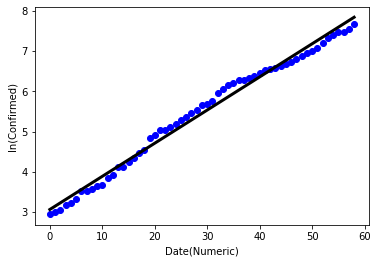

In [162]:
prediction_space = np.linspace(min(X),max(X)).reshape(-1,1)
plt.scatter(X, Y , color='blue')
plt.plot(prediction_space, reg.predict(prediction_space),color='black', linewidth=3)
plt.ylabel('ln(Confirmed)')
plt.xlabel('Date(Numeric)')
plt.show()

El Modelo de regresión Lineal nos quedaría de la siguiente forma:

In [146]:
print('y = ',round(float(reg.coef_[0]),4),'x + ',round(float(reg.intercept_),10))

y =  0.0824 x +  3.0655370802


Ahora recordemos que los datos de Y fueron transformados por el Logaritmo natural, por lo que debemos transformar nuestra formula para considerar eso:

$$y = e^(0.0824x+ 3.0655370802)$$

                                                                 o 

$$y = 21.445977104e^(0.0824x)$$


Con el modelo obtenido, graficamos en los datos originales.

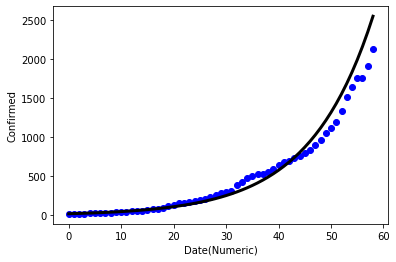

In [199]:
#Generamos un Vector con los 59 días que usamos de datos
x = np.arange(0,59)
#Calculamos el vector resultante con la función
y = np.exp(0.0824*x + 3.0655370802)
#Forma Alternativa
#y = 21.445977104 * np.exp(0.0824*x)

#Desplegamos la grafica
plt.scatter(GT_confirmed["Date(Numeric)"], GT_confirmed["Confirmed"] , color='blue')
plt.plot(x, y,color='black', linewidth=3)
plt.ylabel('Confirmed')
plt.xlabel('Date(Numeric)')
plt.show()

##### Calificación del Modelo

Por defecto scikit learn maneja la función R^2 para calificar el modelo.

In [180]:
# Compute and print R^2 
print("R^2: {}".format(reg.score(X, Y)))

R^2: 0.9874196265288994


Como vemos un R^2 de 0.99 para el Modelo es un buen indicador, se podría decir que es casi exacto. Pero para poder compararlo con el modelo que haremos en TensorFlow sacaremos el Error de acuerdo a:

$$error = 1/2*average((y-y_{hat})^2)$$

In [193]:
y_hat= 0.0824*x + 3.0655370802
error= 1/2* np.mean((np.array(y_hat).reshape(-1,1) - np.array(Y).reshape(-1,1))**2)
print("Error: {}".format(error))

Error: 0.012543369786288642


#### Usando TensorFlow

Copiamos las funciones para la creación del Modelo y la función de entrenamiento de la Practica anterior; ajustando la programación para varias features (Aunque no sirva para este modelo, servirá posteriormente).

In [148]:
import tensorflow as tf
if tf.__version__.startswith("2."):
  import tensorflow.compat.v1 as tf
  tf.compat.v1.disable_v2_behavior()
  tf.compat.v1.disable_eager_execution()
  print("Enabled compatitility to tf1.x")

Instructions for updating:
non-resource variables are not supported in the long term
Enabled compatitility to tf1.x


In [150]:
'''Clase que Definirá el Modelo a Entrenar'''
class Modelo:
    
    '''Metodo que define lo que se ejecuta al Instanciar la Clase'''
    def __init__(self,features):
        
        #Limpiamos cualquier variable o operación en el grafo 
        tf.reset_default_graph()
        
        #Parametros que entrenará el Modelo - Pendiente e Intercepto
        self.parametros = tf.get_variable("parametros",dtype=tf.float32,shape=(features,1),initializer=tf.zeros_initializer())
        
        ##Definimos los Tensores para la Inicialización de Variables
        with tf.name_scope("Inicializacion"):
            init_global = tf.global_variables_initializer()
            init_local = tf.local_variables_initializer()
            self.init = tf.group(init_global,init_local)
    
    '''Metodo que define el Modelo de Predicción'''    
    def __call__(self,x):
        ##Definimos el Modelo de Predicción
        with tf.name_scope("Modelo"):            
            #lo almacenamos en la propiedad de la clase self.y_hat para que pueda reutilizarse en los otros metodos
            #y no llamarlos varias veces - creando multiples instancias del modelo en tensorboard
            self.y_hat = tf.matmul(x,self.parametros,name="Prediccion_Modelo")
        return self.y_hat
    
    '''Metodo que define la Función de Error del Modelo''' 
    def error_function(self,y,y_hat):
        ##Definimos la función de Error
        with tf.name_scope("Error"):
            #lo almacenamos en la propiedad de la clase self.error para que pueda reutilizarse en los otros metodos
            #y no llamarlos varias veces - creando multiples instancias del modelo en tensorboard
            self.error = 1/2*tf.reduce_mean(tf.math.square(y - y_hat) )
        return self.error
    
    '''Metodo que define como se actualizan las variables que se entrenan en el Modelo''' 
    def actualizar(self,x,y,learning_rate):
        #Quitamos esto - Para no crear multiples tensores con el modelo de predicción
        #y_hat = self(x) 
    
        #Quitamos esto - Para no crear multiples tensores con el modelo de Error
        #error = self.error_function(y,self.y_hat)
        
        #Calculo de la Gradiente - Para variables de Pendiente e Intercepto
        with tf.name_scope("Calculo_Gradiente"):
            gradiente = tf.gradients(self.error,self.parametros)
        
        #Actualización de Variables del Modelo - Definición Tensores
        with tf.name_scope("Act_Parametros_Modelo"):
            actualizacion_parametros = tf.assign(self.parametros, self.parametros - learning_rate* gradiente[0] )
        return actualizacion_parametros
    
    '''Metodo que define el Scalar para Tensorboard'''
    def summary(self,x,y):
        #Quitamos esto - Para no crear multiples tensores con el modelo de predicción
        #self.y_hat = self(x)
        
        #Quitamos esto - Para no crear multiples tensores con el modelo de Error
        #error = self.error_function(y,self.y_hat)
        
        #Creamos el Tensor con la Información del Scalar
        MSE_summary = tf.summary.scalar(name='MSE_Function', tensor=self.error)
        return MSE_summary

In [151]:
import time

def Entrenamiento(learning_rate,epochs,imprimir_cada,x,y):
    
    #A la Matris X le agregamos una columna con 1 para el intercepto y que funcione el producto punto
    x_train = np.ones((x.shape[0],x.shape[1]+1))
    x_train[:,:-1]=x  
    
    #El Número de Features se determinará por las columnas enviadas en x + 1 (intercepto)
    features=x_train.shape[1]
    
    #Instanciamos la Clase que define el Modelo
    modelo = Modelo(features)
    
    #string de configuración para almacenamiento del Grafo
    string_conf= time.strftime("%Y%m%d") + "_"+time.strftime("%H%M%S")+"_Exp_Batch_GradientDescent_Lr="+str(learning_rate)

    #Definimos los Placeholders que almacenarán los datos de Entrenamiento del Modelo
    tensor_x = tf.placeholder(tf.float32,[None,features],name="tensor_x")
    tensor_y = tf.placeholder(tf.float32,[None,1],name="tensor_y")

    #Llamamos a la función que define el modelo de Predicción
    prediccion = modelo(tensor_x)

    #Llamamos a la función que define la Función de Error (Costo)
    funcion_error = modelo.error_function(prediccion,tensor_y)

    #Llamamos a la función que define los tensores para actualizar las variables del Modelo
    actualizacion_parametros = modelo.actualizar(tensor_x,tensor_y,learning_rate)

    #llamamos a la función que define el Scalar a Reportar en Tensorboard
    MSE_summary = modelo.summary(tensor_x,tensor_y)

    #Iniciamos con una Sesión Monitoreada - Para el Entrenamiento del Modelo
    with tf.train.MonitoredSession() as session:

        # Inicialización de variables Globales y locales
        session.run(modelo.init)

        #Escritura del Grafo para Tensorboard
        writer = tf.summary.FileWriter('./graphs/'+string_conf, session.graph)

        #Creamos el Diccionario que le dará valor a los Placeholders
        feed_dict = {tensor_x:np.array(x_train).reshape(-1,features), tensor_y:np.array(y).reshape(-1,1)}

        #Entrenamiento del Modelo
        for step in range(epochs):

            #Ejecutamos el Grafo - Actualización de Datos
            session.run(actualizacion_parametros,feed_dict=feed_dict)
            #print(gr[0].shape)
            
            #Ejecutamos el Grafo - Predicción del Modelo
            predicciones = session.run(prediccion,feed_dict=feed_dict)
            
            #Ejecutamos el Grafo - Resultado de Variables Entrenadas
            pendiente_final,intercepto_final = session.run(modelo.parametros,feed_dict=feed_dict)

            #Ejecutamos el Grafo - Datos Escalar
            summary = session.run(MSE_summary,feed_dict=feed_dict)

            #Almacenamos datos de Scalar - Para Tensorboard
            writer.add_summary(summary, step)

            #Imprimimos resultados de Variables por entrenamiento - Cada N Entrenamientos
            if (step+1) % imprimir_cada == 0:
                print("Prueba {} - Parámetros finales: m={}  b={}".format(step+1,pendiente_final,intercepto_final))

        # Si queremos imprimir la función de Error - Despues del Entrenamiento 
        final_error = session.run(funcion_error,feed_dict=feed_dict)
        print("Error - Despues de Entrenamiento={}".format(final_error))

Haremos varias pruebas para encontrar el Learning Rate, la cantidad de Epochs necesarios para el modelo. 

(No colocaremos todas las pruebas aquí, solo la final con la que logramos los mejores resultados).

In [202]:
#Usaremos el mismo Learning rate del Proyecto
learning_rate = 0.001765

#Definimos cuantas iteraciones de Entrenamiento haremos
epochs=20000

#Definimos cada cuanto vamos a imprimir
imprimir_cada = 5000

#Para mayor legibilidad lo almacenaremos el variables separadas al data frame
X = np.array(GT_confirmed["Date(Numeric)"]).reshape(-1,1)
Y = np.array(GT_confirmed["ln(confirmed)"]).reshape(-1,1)

#Ejecutamos la función de Entrenamiento para los parametros definidos
Entrenamiento(learning_rate,epochs,imprimir_cada,X,Y)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Prueba 5000 - Parámetros finales: m=[0.0905773]  b=[2.7466679]
Prueba 10000 - Parámetros finales: m=[0.08325186]  b=[3.0323234]
Prueba 15000 - Parámetros finales: m=[0.08248872]  b=[3.0620792]
Prueba 20000 - Parámetros finales: m=[0.08240923]  b=[3.0651765]
Error - Despues de Entrenamiento=0.012543395161628723


El Modelo de regresión Lineal nos quedaría de la siguiente forma:

$$ y = 0.08240923x + 3.0651765 $$

Ahora recordemos que los datos de Y fueron transformados por el Logaritmo natural, por lo que debemos transformar nuestra formula para considerar eso:

$$y = e^(0.08240923x + 3.0651765)$$

                                                                 o 

$$y = 21.4382 e^(0.0824092 x)$$


Con el modelo obtenido, graficamos en los datos originales.

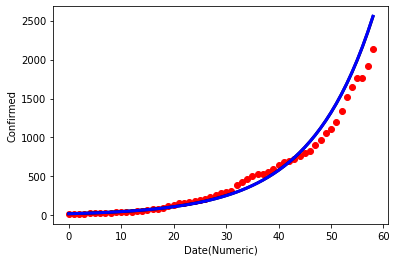

In [203]:
#Generamos un Vector con los 59 días que usamos de datos
x = np.arange(0,59)
#Calculamos el vector resultante con la función
y2 = np.exp(0.08248872*x + 3.0620792)
#Forma Alternativa
#y2 = 21.445977104 * np.exp(0.0824*x)

#Desplegamos la grafica
plt.scatter(GT_confirmed["Date(Numeric)"], GT_confirmed["Confirmed"] , color='red')
#Graficamos modelo realizado con ScikitLearn
plt.plot(x, y,color='black', linewidth=3)
#Graficamos modelo realizado con Tensorflow
plt.plot(x, y2,color='blue', linewidth=3)
plt.ylabel('Confirmed')
plt.xlabel('Date(Numeric)')
plt.show()

Aunque no es visible, se coloco en la misma gráfica los resultados evaluados con la función anterior, y por lo que podemos ver, visualmente no hay mayor diferencia.

##### Calificación del Modelo

Con Tensorflow con una gran cantidad de pruebas, acercamos el error del modelo a **0.012543395** que es muy parecida a la obtenida con Scikitlearn, pero un poco mayor. 

El problema fue la cantidad de pruebas que tuvimos que usar para llegar a ese resultado, fueron 20,000 pruebas y aún así el margen es un poco mejor el de scikit learn.

### Construcción de Función - A Partir del Modelo

Crearemos la función en Python que nos permita determinar el número de casos confirmados a una fecha (basandonos en los datos obtenidos por el modelo)

In [214]:
##Creación de Función que nos devolverá la proyección de casos proyectados a una fecha
##Para facilidad se recibiran los datos separados de dia, mes, año
def Casos_Confirmados_GT(dia, mes, año):
    date = datetime.datetime(año, mes,dia)
    
    #Se convierte en un objeto de Numpy Datetime64 que es el mismo dato que tenemos en el Dataset
    date_Converted = np.datetime64(date)
    
    #Convertimos la fecha a un consecutivo a partir de la fecha base
    id_date = mod_fecha_COVID(date_Converted)
    
    Confirmados= np.exp(0.0824*id_date + 3.0655370802)
    
    return Confirmados

### Predicción a Fecha

Tal como lo solicita el problema, se hará una predicción del número de casos confirmados al 06 de Junio 2020.

In [222]:
Confirmados= Casos_Confirmados_GT(6, 6, 2020)

print("El Número de Casos Confirmados al 6 de Junio sera {}".format(round(Confirmados,0)))

El Número de Casos Confirmados al 6 de Junio sera 11248.0


## Parte 2 - Modelo polinomial de calidad de vinos

Es permitido utilizar [sklearn.preprocessing.polynomialfeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)


### Instrucciones

1. Seleccionar y transformar(generando las combinaciones polinomiales para un polinomio de grado dos o tres a elección) las features que considere que son las mejores para predecir la calidad del vino, utilizar como minimo 2 features. Para seleccionar las features, hacer un analisis exploratorio por ejemplo(pero no limitado a ):  graficando y viendo la forma en que se comportan los datos.

 Por ejemplo, se tienen las features "a" y "b" y seleccionamos polinomio de grado 2, hacemos feature engineering para obtener :
 
 $[a,b,a^{2},b^{2},ab]$
 
 No olvidar el "bias" (parámetro multiplicado por 1) ,con lo cual el dataset puede quedar con las columnas:
 
 $[1,a,b,a^{2},b^{2},ab]$
2. Una vez transformada la data aplicar regresion lineal con las features polinomiales usando Tensorflow.

Requisitos adicionales:
* Se debe agregar al notebook un screenshot del grafo de tensorboard, simplificando(usando  names , y name_scope como visto en clase).

* Se debe generar un directorio de logs de tensorboard para cada corrida/experimento , con cada directorio identificando facilmente la configuración del experimento como visto en clase, por ejemplo para un experimento con learning rate = 0.1 , y polinomio grado 2  crear un directorio: lr=0.1_polinomio_grado=2. (Agregar al notebook un screenshot de estas gráficas)

* Concluir en markdown cual es el mejor modelo para este caso basado en la comparativa entre curvas de costo/error en tensorboard.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('winequality-red.csv')

### Red Wine Quality Data

Se aplicará regresión para crear un modelo de la calidad de vino en función de características del mismo, siendo 1 el peor vino y 10 el mejor.

Variables de entrada:
1. fixed acidity 
2. volatile acidity 
3. citric acid 
4. residual sugar 
5. chlorides 
6. free sulfur dioxide 
7. total sulfur dioxide 
8. density 
9. pH 
10. sulphates 
11. alcohol 

Varaible a predecir: 
12. quality (puntuacion  entre 0 y 10) 



In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
